In [1]:
'''Проект "Разведывательный анализ данных":
Суть: Оценка влияния уровня жизни у детей в возрасте от 15 до 22 лет на их успеваемость по математике'''
#  Загружаю данные и используюемые библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df = pd.read_csv('stud_math.csv')
init_length = len(df)

display(df.head(5))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


### Расшифровка заголовков:
1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

In [3]:
'''1а. Приведение заголовков к более читаемому виду, удобному для работы'''
df.columns = df.columns.str.lower()
df.columns = ['school', 'sex', 'age', 'adress', 'fam_size', 'par_status', 'm_edu', 'f_edu',
              'm_job', 'f_job', 'reason', 'guardian', 'traveltime', 'studytime',
              'failures', 'school_sup', 'fam_sup', 'paid', 'activities', 'nursery',
              'studytime_granular', 'higher', 'internet', 'romantic', 'fam_rel',
              'freetime', 'go_out', 'health', 'absences', 'score']

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

display(df.head(10))

,school,sex,age,adress,fam_size,par_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,school_sup,fam_sup,paid,activities,nursery,studytime_granular,higher,internet,romantic,fam_rel,freetime,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   adress              378 non-null    object 
 4   fam_size            368 non-null    object 
 5   par_status          350 non-null    object 
 6   m_edu               392 non-null    float64
 7   f_edu               371 non-null    float64
 8   m_job               376 non-null    object 
 9   f_job               359 non-null    object 
 10  reason              378 non-null    object 
 11  guardian            364 non-null    object 
 12  traveltime          367 non-null    float64
 13  studytime           388 non-null    float64
 14  failures            373 non-null    float64
 15  school_sup          386 non-null    object 
 16  fam_sup 

None

,age,m_edu,f_edu,traveltime,studytime,failures,studytime_granular,fam_rel,freetime,go_out,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


school                 0.000000
sex                    0.000000
age                    0.000000
adress                 4.303797
fam_size               6.835443
par_status            11.392405
m_edu                  0.759494
f_edu                  6.075949
m_job                  4.810127
f_job                  9.113924
reason                 4.303797
guardian               7.848101
traveltime             7.088608
studytime              1.772152
failures               5.569620
school_sup             2.278481
fam_sup                9.873418
paid                  10.126582
activities             3.544304
nursery                4.050633
studytime_granular     1.772152
higher                 5.063291
internet               8.607595
romantic               7.848101
fam_rel                6.835443
freetime               2.784810
go_out                 2.025316
health                 3.797468
absences               3.037975
score                  1.518987
dtype: float64

<AxesSubplot:>

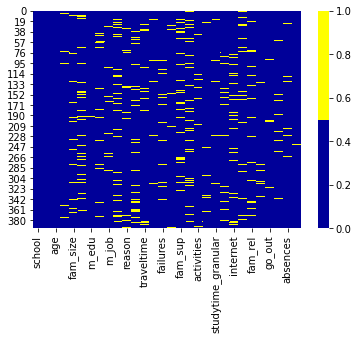

In [4]:
'''1б. Оцениваю тип данных в столбцах, количество ненулевых значений, и статистические характеристики для числовых значений'''
display(df.info())
display(df.describe())
display(df.isnull().sum()/len(df)*100)

# Пропуски визуально
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

Создать индикатор пропуска для: adress
Создать индикатор пропуска для: fam_size
Создать индикатор пропуска для: par_status
Создать индикатор пропуска для: m_edu
Создать индикатор пропуска для: f_edu
Создать индикатор пропуска для: m_job
Создать индикатор пропуска для: f_job
Создать индикатор пропуска для: reason
Создать индикатор пропуска для: guardian
Создать индикатор пропуска для: traveltime
Создать индикатор пропуска для: studytime
Создать индикатор пропуска для: failures
Создать индикатор пропуска для: school_sup
Создать индикатор пропуска для: fam_sup
Создать индикатор пропуска для: paid
Создать индикатор пропуска для: activities
Создать индикатор пропуска для: nursery
Создать индикатор пропуска для: studytime_granular
Создать индикатор пропуска для: higher
Создать индикатор пропуска для: internet
Создать индикатор пропуска для: romantic
Создать индикатор пропуска для: fam_rel
Создать индикатор пропуска для: freetime
Создать индикатор пропуска для: go_out
Создать индикатор пропус

<AxesSubplot:xlabel='index'>

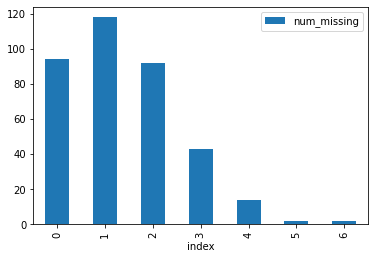

In [647]:
'''1в*. Оцениваю сколько строк имеет пропуски'''

# создаю индикатор для признаков с пропущенными данными c вспомогательным DataFrame = df1
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:
        print('Создать индикатор пропуска для: {}'.format(col))
        df1['{}_ismissing'.format(col)] = missing

# на основе индикатора строю гистограмму
ismissing_cols = [col for col in df1.columns if 'ismissing' in col]
df1['num_missing'] = df1[ismissing_cols].sum(axis=1)

df1['num_missing'].value_counts().reset_index().sort_values(
    by='index').plot.bar(x='index', y='num_missing')

#  Пояснение: Количество строк не содержащих пропусков - чуть меньше 100

<ipython-input-5-2d16054c8020>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.select_dtypes(include='number').hist(ax=ax)


Количество отрицательных удалеямых значений в столбце fam_rel = 1


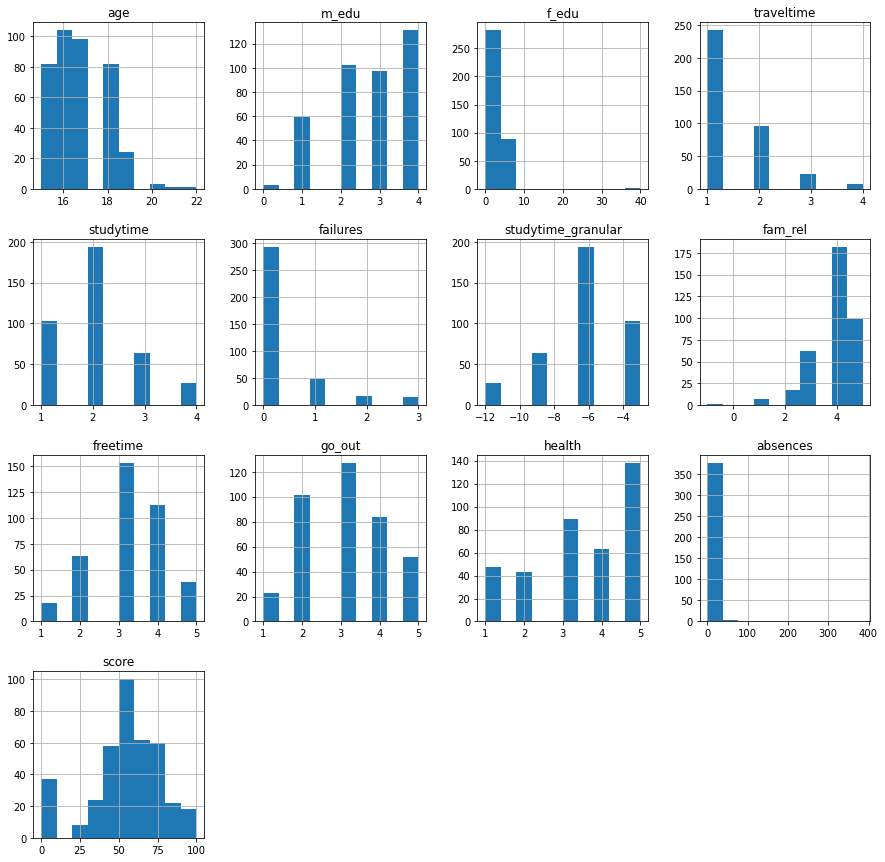

In [5]:
'''2. Выбросы.'''
# Оценю визуально числовые данные на наличие выбросов
fig = plt.figure(figsize=(15, 15))
ax = fig.gca()
df.select_dtypes(include='number').hist(ax=ax)

'''2а. Согласно статистике из пункта 1б, а также опираясь на визуальные данные, видно, 
что выбросы имеются в числовых столбцах f_edu, fam_rel и absences'''

# Столбец fam_rel не может содержать отрицательных значений по определению, а значит исключаю такие значения:

print('Количество отрицательных удалеямых значений в столбце fam_rel = {}'.format(
    len(df.loc[df.fam_rel < 0])))
df = df.drop(index=df.loc[df.fam_rel < 0].index)

# df.info()

In [6]:
'''2б. Удаляю выбросы из столбцов 'f_edu', 'absences'''

cols = ['f_edu', 'absences']

num_df = df[cols]


def calc_iqr(columns):
    out = []
    for column in list(columns):
        perc25 = num_df[column].quantile(0.25)
        perc75 = num_df[column].quantile(0.75)
        IQR = perc75 - perc25
        low_bound = ((perc25 - 1.5*IQR))
        up_bound = ((perc75 + 1.5*IQR))
        out.append((column, IQR, perc25, perc75, low_bound, up_bound))
    temp = pd.DataFrame(out, columns=(
        'columns', 'IQR', 'perc25', 'perc75', 'low_bound', 'up_bound'))
    return temp


x = calc_iqr(cols)
display(x)

for y in range(len(x)):
    low_bound = x.iloc[y, 4]
    up_bound = x.iloc[y, 5]
    name = x.iloc[y, 0]
    df1 = df[(df[name] >= low_bound)]
    df1 = df[(df[name] <= up_bound)]

df = df1

print('Количество строк с удалёнными  выбросами - {}'.format(init_length - len(df)))

,columns,IQR,perc25,perc75,low_bound,up_bound
0,f_edu,1.0,2.0,3.0,0.5,4.5
1,absences,8.0,0.0,8.0,-12.0,20.0


Количество строк с удалёнными  выбросами - 30


In [7]:
'''3а. Оцениваю количество уникальных значений для номинативных переменных'''
object_df = df.select_dtypes(include=object)

for col in object_df:
    print('Уникальных значений в столбце {} - {}: {}'.format(col,
                                                             df[col].nunique(), df[col].unique()))

Уникальных значений в столбце school - 2: ['GP' 'MS']
Уникальных значений в столбце sex - 2: ['F' 'M']
Уникальных значений в столбце adress - 2: ['U' nan 'R']
Уникальных значений в столбце fam_size - 2: [nan 'GT3' 'LE3']
Уникальных значений в столбце par_status - 2: ['A' nan 'T']
Уникальных значений в столбце m_job - 5: ['at_home' 'health' 'other' 'services' 'teacher' nan]
Уникальных значений в столбце f_job - 5: ['teacher' 'other' nan 'health' 'services' 'at_home']
Уникальных значений в столбце reason - 4: ['course' 'other' 'home' 'reputation' nan]
Уникальных значений в столбце guardian - 3: ['mother' 'father' 'other' nan]
Уникальных значений в столбце school_sup - 2: ['yes' 'no' nan]
Уникальных значений в столбце fam_sup - 2: ['no' 'yes' nan]
Уникальных значений в столбце paid - 2: ['no' nan 'yes']
Уникальных значений в столбце activities - 2: ['no' 'yes' nan]
Уникальных значений в столбце nursery - 2: ['yes' 'no' nan]
Уникальных значений в столбце higher - 2: ['yes' nan 'no']
Уникал

In [15]:
'''3б. Оценю визуально возможность корреляции номинатативных данных на итоговый балл'''


def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(4, 8))
    sns.boxplot(x=column, y='score', data=df, ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


for col in df.select_dtypes(include=object).columns:
    get_boxplot(col)

Отсутствие расхождений в медианах в частоте встречания различных ответов в одной категории, говорит о том, что данные столбцы незначительно влияют на итоговые оценки студентов.
Вот эти столбцы: fam_size, par_status, fam_sup, paid, activities, nursery, romantic.
Столбцы ответов, которые могут оказывать влияние на итоговую оценку:
['school', 'sex', 'adress', 'm_job', 'f_job', 'reason', 'guardian', 'school_sup', 'higher', 'internet']

In [663]:
'''3в. Удалю ненужные для модели столбцы из набора данных'''
df = df.drop(['fam_size', 'par_status', 'fam_sup', 'paid',
              'activities', 'nursery', 'romantic'], axis=1)
df

,school,sex,age,adress,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,school_sup,studytime_granular,higher,internet,fam_rel,freetime,go_out,health,absences,score
0,GP,F,18,U,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,-6.0,yes,NaN,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,-6.0,yes,yes,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,-6.0,yes,yes,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,-9.0,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,-6.0,yes,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,U,1.0,1.0,other,other,course,mother,NaN,2.0,1.0,no,-6.0,yes,NaN,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17,U,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,-3.0,yes,yes,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,-3.0,NaN,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,-3.0,yes,yes,4.0,4.0,1.0,5.0,0.0,50.0


In [9]:
'''4а. Заменю отсутствующие значения на значения моды данного столбца для номинативных значений
и для числовых - на медиану
и назову набор данных - df_fill'''


def null_replace(x):
    for i in df.columns:
        if df[i].dtype == float:
            df[i] = df[i].fillna(df[i].median())

        elif df[i].dtype == object:
            df[i] = df[i].fillna(df[i].mode()[0])
    return x


df_fill = null_replace(df)

In [10]:
'''4. Преобразую номинатативные данные с помощью метода label_encoder() в числовые'''
for col in df_fill.select_dtypes(include=object):
    df_fill[col] = le.fit_transform(df_fill[col])
display(df_fill)

,school,sex,age,adress,fam_size,par_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,school_sup,fam_sup,paid,activities,nursery,studytime_granular,higher,internet,romantic,fam_rel,freetime,go_out,health,absences,score
0,0,0,18,1,0,0,4.0,4.0,0,4,0,1,2.0,2.0,0.0,1,0,0,0,1,-6.0,1,1,0,4.0,3.0,4.0,3.0,6.0,30.0
1,0,0,17,1,0,1,1.0,1.0,0,2,0,0,1.0,2.0,0.0,0,1,0,0,0,-6.0,1,1,0,5.0,3.0,3.0,3.0,4.0,30.0
2,0,0,15,1,1,1,1.0,1.0,0,2,2,1,1.0,2.0,3.0,1,0,0,0,1,-6.0,1,1,0,4.0,3.0,2.0,3.0,10.0,50.0
3,0,0,15,1,0,1,4.0,2.0,1,2,1,1,1.0,3.0,0.0,0,1,1,1,1,-9.0,1,1,1,3.0,2.0,2.0,5.0,2.0,75.0
4,0,0,16,1,0,1,3.0,3.0,2,2,1,0,1.0,2.0,0.0,0,1,1,0,1,-6.0,1,0,0,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,1,0,18,1,0,1,1.0,1.0,2,2,0,1,1.0,2.0,1.0,0,0,0,1,1,-6.0,1,1,0,1.0,1.0,1.0,5.0,0.0,0.0
391,1,1,17,1,1,1,3.0,1.0,3,3,0,1,2.0,1.0,0.0,0,0,0,0,0,-3.0,1,1,0,2.0,4.0,5.0,2.0,3.0,80.0
392,1,1,21,0,0,1,1.0,1.0,2,2,0,1,1.0,1.0,3.0,0,0,0,0,0,-3.0,1,0,0,5.0,5.0,3.0,3.0,3.0,35.0
393,1,1,18,0,1,1,3.0,2.0,3,2,0,1,3.0,1.0,0.0,0,0,0,1,0,-3.0,1,1,0,4.0,4.0,1.0,5.0,0.0,50.0


In [11]:
'''5.Проверка корреляции числовых столбцов c подцветкой коррелирующих значений для удобства оценки'''
cm = sns.light_palette("green", as_cmap=True)
s = df_fill.corr().style.background_gradient(cmap=cm)
s

,school,sex,age,adress,fam_size,par_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,school_sup,fam_sup,paid,activities,nursery,studytime_granular,higher,internet,romantic,fam_rel,freetime,go_out,health,absences,score
school,1.000000,-0.035301,0.385557,-0.279111,0.039096,0.085018,-0.119836,-0.054103,-0.040847,0.036493,-0.068693,-0.014454,0.253068,-0.092266,0.057529,-0.142334,-0.206516,-0.011030,-0.116007,-0.112505,0.092266,-0.002928,-0.079262,0.066198,-0.053972,0.016580,-0.007530,-0.049336,-0.079078,-0.035446
sex,-0.035301,1.000000,-0.047898,0.005315,0.068265,0.045423,0.085082,-0.031572,0.182563,0.070067,-0.105961,-0.092462,0.052365,-0.304930,0.036565,-0.123360,-0.162451,-0.126264,0.099825,-0.006608,0.304930,-0.142742,0.082319,-0.133746,0.036443,0.214414,0.061105,0.128376,0.033115,0.112609
age,0.385557,-0.047898,1.000000,-0.151428,0.004396,0.046179,-0.183126,-0.142216,-0.076787,-0.043513,-0.029634,0.241795,0.086640,0.001293,0.204759,-0.231744,-0.161095,-0.030048,-0.113658,-0.112229,-0.001293,-0.195138,-0.101740,0.131649,0.057157,0.052438,0.133123,-0.063925,0.155003,-0.156168
adress,-0.279111,0.005315,-0.151428,1.000000,0.062480,-0.067077,0.157419,0.063387,0.139908,-0.013878,-0.078025,-0.046669,-0.268037,-0.023190,-0.110068,0.040784,0.040135,0.061893,-0.036057,0.043900,0.023190,0.051608,0.210118,-0.018589,-0.004357,0.052829,0.067585,-0.038257,-0.037753,0.141149
fam_size,0.039096,0.068265,0.004396,0.062480,1.000000,-0.072351,-0.019627,-0.051877,0.094751,-0.058507,-0.005432,-0.023818,0.036037,-0.073848,-0.013561,-0.013761,-0.097721,-0.069007,-0.021079,0.101103,0.073848,0.010226,0.015810,-0.001431,-0.040891,0.000296,0.017192,-0.018831,0.080779,0.079818
par_status,0.085018,0.045423,0.046179,-0.067077,-0.072351,1.000000,-0.125396,-0.040324,-0.029489,0.003893,-0.020028,-0.096970,0.101403,-0.003822,0.007579,-0.054358,-0.002730,0.041926,0.084758,-0.080636,0.003822,-0.066374,0.031901,-0.047770,0.044173,0.040641,0.025643,0.043906,-0.104894,-0.052622
m_edu,-0.119836,0.085082,-0.183126,0.157419,-0.019627,-0.125396,1.000000,0.255533,0.445371,0.174929,0.112827,-0.034672,-0.184069,0.081984,-0.244968,-0.028966,0.194974,0.120889,0.089933,0.159314,-0.081984,0.144498,0.193765,0.014000,-0.029023,0.027477,0.046705,-0.056343,0.069219,0.200975
f_edu,-0.054103,-0.031572,-0.142216,0.063387,-0.051877,-0.040324,0.255533,1.000000,0.130018,0.069661,0.086920,-0.133856,0.043373,0.048514,-0.150789,0.003625,0.111550,-0.016132,0.087278,0.079731,-0.048514,0.089067,0.073562,-0.027831,0.037772,-0.069557,-0.031743,0.018498,-0.016092,0.065014
m_job,-0.040847,0.182563,-0.076787,0.139908,0.094751,-0.029489,0.445371,0.130018,1.000000,0.174073,0.003828,-0.013418,-0.075773,0.006509,-0.090690,-0.049137,0.066412,0.099710,0.092284,0.105615,-0.006509,0.089610,0.159761,-0.087617,0.040598,0.108381,0.001174,0.063426,0.039041,0.095689
f_job,0.036493,0.070067,-0.043513,-0.013878,-0.058507,0.003893,0.174929,0.069661,0.174073,1.000000,-0.064104,-0.081945,0.051815,-0.063028,0.017102,-0.002328,-0.062894,-0.027058,0.043465,-0.044271,0.063028,-0.046386,0.012311,0.029918,0.023686,-0.017089,0.044157,-0.014509,-0.068401,-0.000956


Видно, что у study_time и studytime_granular коэффициент корреляции по модулю одинаков, а значит исключим один из них.

In [12]:
'''5а. Исключаю столбец studytime_granular '''
df_fill = df_fill.drop(['studytime_granular'], axis=1)

In [13]:
'''6.Отбираю некоррелирующие переменные с помощью метода Стьюдента.'''


def get_stat_dif(column):
    cols = df_fill.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df_fill.loc[df_fill.loc[:, column] == comb[0], 'score'],
                     df_fill.loc[df_fill.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони для альфа = 5%
            print('Найдены статистически значимые различия для колонки', column)
            break


for col in df_fill:
    if 'score' in col:
        break
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки adress
Найдены статистически значимые различия для колонки m_edu
Найдены статистически значимые различия для колонки m_job
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки absences


/Users/fixed/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/fixed/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/fixed/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/fixed/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/fixed/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/fixed/opt/an

In [14]:
'''6.Вывод некоррелирующих величин'''
student_for_model = df.loc[:, ['sex', 'adress',
                               'm_edu', 'm_job', 'failures', 'higher', 'absences']]
student_for_model.head()

,sex,adress,m_edu,m_job,failures,higher,absences
0,0,1,4.0,0,0.0,1,6.0
1,0,1,1.0,0,0.0,1,4.0
2,0,1,1.0,0,3.0,1,10.0
3,0,1,4.0,1,0.0,1,2.0
4,0,1,3.0,2,0.0,1,4.0


'''7. Выводы'''

В результате EDA для анализа влияния параметров условий жизни на итоговую оценку по математике у детей от 15 до 22 лет были получены следующие выводы:
1. В данных достаточно мало пустых значений. Максимальное количество пропусков данных находится в интервале 10-12%, им соответствуют два столбца: paid (платные занятия), par_status (семейный статус родителей).
2. Выбросы найдены только в столбцах f_edu (образование отца), fam_rel (отношения в семье) и  absences (количество пропущенных занятий), что позволяет сделать вывод о том, что данные достаточно чистые.
3. Одинаковые по модулю значения коэффициентов корреляции study_time и (study_time, granular) говорят о том, что данные параметры связаны между собой обратной линейной зависимостью.
4. Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это sex, adress, m_edu, m_job, failures, higher, absences (Соответственно: пол ребёнка, адрес проживания, образование матери, работа матери, количество внеучебных задач, желание получить высшее образование, количество пропущенных занятий).